### Импорты

In [18]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import metrics

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Загрузка данных

In [3]:
# data_encoded = pd.read_csv('../data/train_prepared_one_hot_encoded.csv')
data = pd.read_csv('../data/train_prepared_without_cat_encoding.csv')

In [4]:
data.head()

,home_ownership,income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problem,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
0,Own Home,482087.0,unknown,0.0,11.0,26.3,685960.0,1.0,1.0,debt consolidation,0,1.187318e+07,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,debt consolidation,1,2.649680e+05,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,debt consolidation,0,1.187318e+07,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,1.0,debt consolidation,0,1.213960e+05,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,debt consolidation,0,1.258400e+05,93309.0,7180.0,719.0,0


In [8]:
cat_features = ['home_ownership', 'years_in_current_job', 'tax_liens', 'number_of_credit_problem', 'bankruptcies', 'purpose', 'term']
num_features = ['income', 'number_of_open_accounts', 'years_of_credit_history', 'maximum_open_credit', 'current_loan_amount', 'current_credit_balance', 'monthly_debt', 'credit_score']
target = 'credit_default'

### Визуализация

Попробуем определить, есть ли ярко выраженные кластеры в данных

In [13]:
def plot_3d(x, y, z, color):
    fig = px.scatter_3d(x=x, y=y, z=z,
              color=color)
    
    fig.update_traces(marker=dict(size=3))

    fig.show()

попробуем визуализировать данные полученные после feature encoding

In [12]:
x_embedded = TSNE(n_components=3, learning_rate='auto',
             init='random', perplexity=3).fit_transform(data.drop(columns=[target])[num_features])

In [14]:
plot_3d(x_embedded[:, 0], x_embedded[:, 1], x_embedded[:, 2], data[target])

## Создание фичей

### Определение кластеров в числовых фичах

In [19]:
def show_elbow_plot(x):
    distortions = []
    K = range(1, 10)
    
    data_to_cluster = StandardScaler().fit_transform(x.copy())

    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(data_to_cluster)
        kmeanModel.fit(data_to_cluster)
    
        distortions.append(sum(np.min(cdist(data_to_cluster, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / data_to_cluster.shape[0])


    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

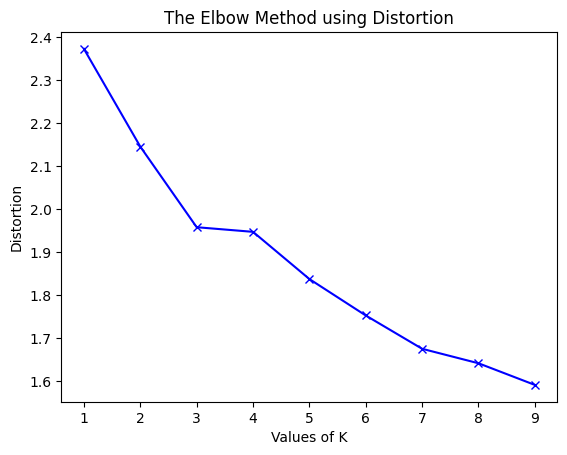

In [30]:
show_elbow_plot(data[num_features])

На этом графике можем видеть хоть какой-то локоть в точке k = 3, в остальных комбинациях графики не имеют выраженных "локтей". Попробуем добавить в качестве фичи

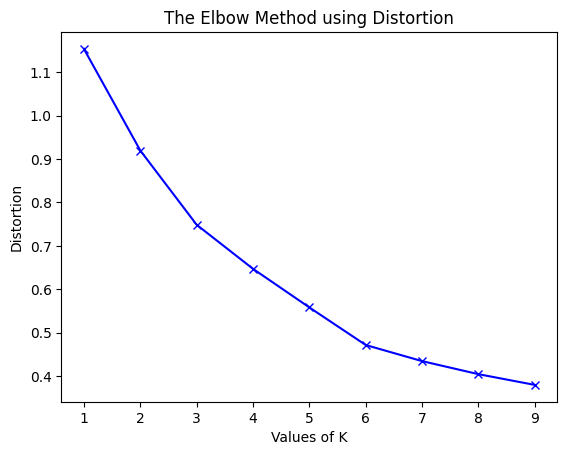

In [29]:
show_elbow_plot(data[['income', 'credit_score']])

In [34]:
kmeans = KMeans(n_clusters=3)
data['num_features_clustered_by_3'] = kmeans.fit_predict(StandardScaler().fit_transform(data[num_features].copy()))

kmeans = KMeans(n_clusters=4)
data['num_features_clustered_by_4'] = kmeans.fit_predict(StandardScaler().fit_transform(data[num_features].copy()))

cat_features.extend(['num_features_clustered_by_3', 'num_features_clustered_by_4'])

In [35]:
data.head()

,home_ownership,income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problem,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default,num_features_clustered_by_3,num_features_clustered_by_4
0,Own Home,482087.0,unknown,0.0,11.0,26.3,685960.0,1.0,1.0,debt consolidation,0,1.187318e+07,47386.0,7914.0,749.0,0,0,2
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,debt consolidation,1,2.649680e+05,394972.0,18373.0,737.0,1,2,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,debt consolidation,0,1.187318e+07,308389.0,13651.0,742.0,0,0,2
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,1.0,debt consolidation,0,1.213960e+05,95855.0,11338.0,694.0,0,2,1
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,debt consolidation,0,1.258400e+05,93309.0,7180.0,719.0,0,2,1


### Коэффициенты, средние значения

In [58]:
data['income_per_credit_history'] = data['income'] * data['years_of_credit_history']
data['mean_credit_score_per_history'] = data['credit_score'] / data['years_of_credit_history']
data['number_of_credit_problem_per_history'] = data['number_of_credit_problem'] / data['years_of_credit_history']
data['number_of_bankruptcies_per_history'] = data['bankruptcies'] / data['years_of_credit_history']
data['current_credit_balance_per_income'] = data['current_credit_balance'] / data['income']
data['monthly_income_per_monthly_debt'] = (data['income'] / 12) / data['monthly_debt']
data['current_loan_amount_per_income'] = data['current_loan_amount'] / data['income']
data['months_to_pay_per_month_of_credit_history'] = (data['current_loan_amount'] / data['monthly_debt']) / (data['years_of_credit_history'] * 12)


In [59]:
num_features.extend([
'income_per_credit_history',
'mean_credit_score_per_history',
'number_of_credit_problem_per_history',
'number_of_bankruptcies_per_history',
'current_credit_balance_per_income',
'monthly_income_per_monthly_debt',
'current_loan_amount_per_income',
'months_to_pay_per_month_of_credit_history'
])

In [60]:
data.head()

,home_ownership,income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problem,bankruptcies,purpose,...,num_features_clustered_by_3,num_features_clustered_by_4,income_per_credit_history,mean_credit_score_per_history,number_of_credit_problem_per_history,number_of_bankruptcies_per_history,current_credit_balance_per_income,monthly_income_per_monthly_debt,current_loan_amount_per_income,months_to_pay_per_month_of_credit_history
0,Own Home,482087.0,unknown,0.0,11.0,26.3,685960.0,1.0,1.0,debt consolidation,...,0,2,12678888.1,28.479087,0.038023,0.038023,0.098293,5.076310,24.628703,4.753724
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,debt consolidation,...,2,1,15689951.1,48.169935,0.000000,0.000000,0.385156,4.651241,0.258383,0.078549
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,debt consolidation,...,0,2,26299420.0,21.200000,0.000000,0.000000,0.410413,4.587039,15.801155,2.070872
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,1.0,debt consolidation,...,2,1,18114030.0,30.844444,0.044444,0.044444,0.119064,5.917181,0.150790,0.039656
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,debt consolidation,...,2,1,10557190.4,52.867647,0.073529,0.000000,0.120203,9.009564,0.162110,0.107393


### PCA

In [61]:
data['current_credit_balance_per_income'].replace([np.inf], 2.1767, inplace=True)
data['monthly_income_per_monthly_debt'].replace([np.inf], 1427, inplace=True)
data['current_loan_amount_per_income'].replace([np.inf], 54.787312, inplace=True)
data['months_to_pay_per_month_of_credit_history'].replace([np.inf], 165.114387, inplace=True)



In [66]:
data['current_credit_balance_per_income'].fillna(data['current_credit_balance_per_income'].median(), inplace=True)
data['monthly_income_per_monthly_debt'].fillna(data['monthly_income_per_monthly_debt'].median(), inplace=True)


In [67]:
data_to_pca = StandardScaler().fit_transform(data[num_features].copy())

In [73]:
pca_5 = PCA(n_components=5)
data_5 = pca_5.fit_transform(data_to_pca)
data_5, pca_5.explained_variance_ratio_

(array([[-0.16881567,  1.08047536, -2.20398177,  1.83758612, -1.15751658],
        [ 0.36350013, -0.01345404,  0.62459101, -0.75849692,  0.17598791],
        [ 0.99283313, -1.46374722,  0.08663967,  1.734586  , -1.46959198],
        ...,
        [ 2.97405008, -1.47853962,  0.15840956,  1.84586393, -0.43792286],
        [-2.99967999, -3.53339036, -0.34390141,  1.74706725,  0.79437092],
        [-4.68490351,  0.01481352,  1.07561473, -0.5546253 ,  1.19908945]]),
 array([0.23306571, 0.15753239, 0.14281694, 0.11948353, 0.06907917]))

In [76]:
for i in range(data_5.shape[1]):
    data[f'PCA_5_{i}'] = data_5[:, i]

In [77]:
data.head()

,home_ownership,income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problem,bankruptcies,purpose,...,number_of_bankruptcies_per_history,current_credit_balance_per_income,monthly_income_per_monthly_debt,current_loan_amount_per_income,months_to_pay_per_month_of_credit_history,PCA_5_0,PCA_5_1,PCA_5_2,PCA_5_3,PCA_5_4
0,Own Home,482087.0,unknown,0.0,11.0,26.3,685960.0,1.0,1.0,debt consolidation,...,0.038023,0.098293,5.076310,24.628703,4.753724,-0.168816,1.080475,-2.203982,1.837586,-1.157517
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,debt consolidation,...,0.000000,0.385156,4.651241,0.258383,0.078549,0.363500,-0.013454,0.624591,-0.758497,0.175988
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,debt consolidation,...,0.000000,0.410413,4.587039,15.801155,2.070872,0.992833,-1.463747,0.086640,1.734586,-1.469592
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,1.0,debt consolidation,...,0.044444,0.119064,5.917181,0.150790,0.039656,0.678198,1.350833,-3.014448,0.179879,-1.588368
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,debt consolidation,...,0.000000,0.120203,9.009564,0.162110,0.107393,-0.075578,1.993978,-1.333405,-0.840971,-0.322678


In [78]:
num_features.extend([
    'PCA_5_0',
    'PCA_5_1',
    'PCA_5_2',
    'PCA_5_3',
    'PCA_5_4',

])

Отбор признаков затем можно производить по mutul information score или исходя из взаимной корреляции признаков

In [79]:
data.to_csv('../data/train_with_all_features_made_without_cat_encoding.csv')